# Introduction to The ChatGPT APIs

Install or update the OpenAI Python library first. [API reference](https://platform.openai.com/docs/api-reference)

In [1]:
!pip install -q openai python-dotenv

You'll need to get an OpenAI API Key here: https://platform.openai.com/account/api-keys. Treat it like a secret password.

In [2]:
import openai
import os
import IPython
openai.api_key = 'OPENAI_API_KEY'

# from dotenv import load_dotenv
# load_dotenv()
# openai.api_key = os.getenv("OPENAI_API_KEY")

To load environment variables, you can use anything you like but we used `python-dotenv`. Just create a `.env` file with your `OPENAI_API_KEY` then load it.

Importing more libraries and packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the data into a dataframe

In [4]:
action_movie = pd.read_csv('action.csv')
family_movie = pd.read_csv('family.csv')
horror_movie = pd.read_csv('horror.csv')
romance_movie = pd.read_csv('romance.csv')
scifi_movie = pd.read_csv('scifi.csv')

Make sure the genre column only have one primarily genre

In [5]:
action_movie['genre'] = 'Action'
family_movie['genre'] = 'Family'
horror_movie['genre'] = 'Horror'
romance_movie['genre'] = 'Romance'
scifi_movie['genre'] = 'Sci-Fi'

Concatenate all dataframes

In [6]:
df = pd.concat([action_movie, family_movie, horror_movie, romance_movie, scifi_movie])

Take a look at the number of genres:

(array([52452.,     0., 17095.,     0.,     0., 36682.,     0., 52617.,
            0., 16557.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

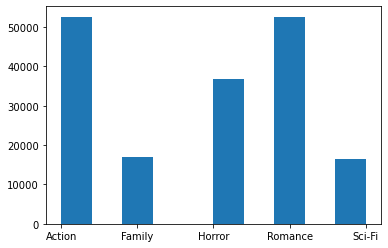

In [7]:
plt.hist(df.genre)

### Guide to Use ChatGPT

Choose a ChatGPT model that you want to try. We used "gpt-3.5-turbo"

In [8]:
MODEL = "gpt-3.5-turbo"

Let's do a basic chat API call to learn about the chat format.

The movie used for this example:

Movie Name: 1917 

Movie Year: 2019 

Movie Genre: Action

Plot Description: April 6th, 1917. As an infantry battalion assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.

In [9]:
CONTENT = """ Given this movie description:
April 6th, 1917. As an infantry battalion assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.

The genre of the movie is: 
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

Let's print the response:

In [10]:
response

<OpenAIObject chat.completion id=chatcmpl-7A3qbBZBKjVMfm25EthJJiQSlRTbn at 0x22896ecbea0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "War/Action/Drama.",
        "role": "assistant"
      }
    }
  ],
  "created": 1682632425,
  "id": "chatcmpl-7A3qbBZBKjVMfm25EthJJiQSlRTbn",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 6,
    "prompt_tokens": 72,
    "total_tokens": 78
  }
}

In [11]:
response['choices'][0]['message']['content']

'War/Action/Drama.'

In [12]:
# pretty format the response
IPython.display.Markdown(response.choices[0]['message']['content'])

War/Action/Drama.

In this example, the response have multiple genres for a movie. Our goal is to have one primarily genre.

### Zero-Shot Learning

In [13]:
CONTENT = """ Given this movie description:
April 6th, 1917. As an infantry battalion assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.

The genre of the movie in one word is: 
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

War.

Make sure that the model only respond with a genre that we chose (Action, Family, Horror, Romance, and Sci-Fi) for this project.

In [14]:
CONTENT = """ Given this movie description:
April 6th, 1917. As an infantry battalion assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.

Classify the movie into one of the following genres: Action, Family, Horror, Romance, Sci-Fi.
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

Action.

#### Let's take another look at a movie that the model should already know.

Movie Name: Black Panther 

Movie Year: 2018 

Movie Genre: Sci-Fi

Plot Description: T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.

In [15]:
CONTENT = """Given this description of a movie: 
T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.

Classify this movie into one of the following genres: Action, Family, Horror, Romance, Sci-Fi.
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

Sci-Fi.

In [16]:
CONTENT = """The plot description of Black Panther is"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

Black Panther is a superhero film that follows T'Challa, the newly crowned king of Wakanda, a technologically advanced African nation. T'Challa must navigate the challenges of ruling his people while also protecting the secret of Wakanda's true power from the outside world. When a dangerous enemy, Erik Killmonger, emerges and challenges T'Challa's claim to the throne, the Black Panther must team up with his allies, including his sister Shuri, his love interest Nakia, and the Dora Milaje, Wakanda's all-female special forces, to stop Killmonger and save Wakanda from destruction. Along the way, T'Challa learns important lessons about leadership, responsibility, and the true meaning of being a hero.

#### Let's take another look at a movie that the model do not know.

Movie Name: Black Panther: Wakanda Forever

Movie Year: 2022 

Movie Genre: Action

Plot Description: The people of Wakanda fight to protect their home from intervening world powers as they mourn the death of King T'Challa.

In [17]:
CONTENT = """Given this description of a movie: 
The people of Wakanda fight to protect their home from intervening world powers as they mourn the death of King T'Challa.

Classify this movie into one of the following genres: Action, Family, Horror, Romance, Sci-Fi.
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

Action.

In [18]:
CONTENT = """What is the plot description of Black Panther: Wakanda Forever."""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

As an AI language model, I do not have access to the plot description of Black Panther: Wakanda Forever as it has not been released yet. However, it is known that the film will continue the story of the fictional African nation of Wakanda and its people following the death of King T'Challa, played by the late Chadwick Boseman. The film is expected to explore the impact of T'Challa's absence on Wakanda and its people, as well as introduce new characters and storylines.

The model can predit the movie genre of a movie that is not in its training and the prediction is correction. The model is being honest about not knowing the movie "Black Panther: Wakanda Forever" and did not make up any plot description.

#### Let's take a look at an interesting example

Movie Name: Empire of Light

Movie Year: 2022 

Movie Genre: Romance

Plot Description: A drama about the power of human connection during turbulent times, set in an English coastal town in the early 1980s.

In [19]:
CONTENT = """Given this description of a movie: 
A drama about the power of human connection during turbulent times, set in an English coastal town in the early 1980s.

Classify this movie into one of the following genres: Action, Family, Horror, Romance, Sci-Fi.
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

Genre: Drama.

In [20]:
CONTENT = """Given this description of a movie: 
A drama about the power of human connection during turbulent times, set in an English coastal town in the early 1980s.

Which genre does this movie belongs to? Pick one only from: Action, Family, Horror, Romance, or Sci-Fi.
"""

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

The genre of this movie is Drama.

In [21]:
CONTENT = """ 
You are a movie genre classifier. Given a description of a movie, you will return a number that represent the genre.
0 = action
1 = horror
2 = family
3 = romance
4 = sci-fi
5 = unknown

Descriptiom: A drama about the power of human connection during turbulent times, set in an English coastal town in the early 1980s.
Genre: """

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

unknown

### One-Shot Learning

In [22]:
CONTENT = """ 
You are a movie genre classifier. Given a description of a movie, you will return a number that represent the genre.
0 = action
1 = horror
2 = family
3 = romance
4 = sci-fi
5 = unknown

Description: Based on the true story, two homicide detectives track Martha Beck and Raymond Martinez Fernandez, a murderous pair known as the "Lonely Hearts Killers" who lured their victims through the personals.
Genre: 5

Descriptiom: A drama about the power of human connection during turbulent times, set in an English coastal town in the early 1980s.
Genre: """

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

3

We successfully got the response we want!

#### Let's take a look at another example

Movie Name: The Watch

Movie Year: 2012 

Movie Genre: Sci-fi

Plot Description: Four men who form a neighborhood watch group as a way to get out of their day-to-day family routines find themselves defending the Earth from an alien invasion.

In [23]:
CONTENT = """ 
You are a movie genre classifier. Given a description of a movie, you will return a number that represent the genre.
0 = action
1 = horror
2 = family
3 = romance
4 = sci-fi
5 = unknown

Description: Two teenagers with cancer fall in love and go on a journey together to Amsterdam to meet their favorite author.
Genre: 3

Description: Four men who form a neighborhood watch group as a way to get out of their day-to-day family routines find themselves defending the Earth from an alien invasion.
Genre: """

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

4

We got the response we want, but if we change the example to the same genre, the response changes.

In [24]:
CONTENT = """ 
You are a movie genre classifier. Given a description of a movie, you will return a number that represent the genre.
0 = action
1 = horror
2 = family
3 = romance
4 = sci-fi
5 = unknown

Description: An astronaut is mistakenly presumed dead and left behind on Mars with only limited supplies, he must use this ingenuity to survive and find a way to communicate with Earth for rescue.
Genre: 4

Description: Four men who form a neighborhood watch group as a way to get out of their day-to-day family routines find themselves defending the Earth from an alien invasion.
Genre: """

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

0

We think that the reason why the response changes is because there is not enough example for the model to learn. It's possible for the model to think that "This genre is taken, I will chose another genre." So let's move onto few-shot learning.

### Few-Shot Learning

In [25]:
CONTENT = """ 
You are a movie genre classifier. Given a description of a movie, you will return a number that represent the genre.
0 = action
1 = horror
2 = family
3 = romance
4 = sci-fi
5 = unknown

Description: A twin falls off a wagon and meets a mountain man who teaches her to spit tobacco for a living.
Genre: 2

Description: An orphaned boy enrolls in a school of wizardry, where he learns the truth about himself, his family and the terrible evil that haunts the magical world.
Genre: 2

Description: Based on the true story, two homicide detectives track Martha Beck and Raymond Martinez Fernandez, a murderous pair known as the "Lonely Hearts Killers" who lured their victims through the personals.
Genre: 5

Description: Two English comic book geeks traveling across the U.S. encounter an alien outside Area 51.
Genre: 4

Description: An astronaut is mistakenly presumed dead and left behind on Mars with only limited supplies, he must use this ingenuity to survive and find a way to communicate with Earth for rescue.
Genre: 4

Description: Four men who form a neighborhood watch group as a way to get out of their day-to-day family routines find themselves defending the Earth from an alien invasion.
Genre: """

response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "user", "content": CONTENT},
    ],
    temperature=0,
)

IPython.display.Markdown(response.choices[0]['message']['content'])

4